# Scraping Statistics from www.trackcorona.live/

In [1]:
!pip install cloudscraper

In [2]:
import requests
import cloudscraper
from bs4 import BeautifulSoup
import re
import pandas as pd
import time
import datetime

TOTAL STATISTICS

In [3]:
#DATA EXTRACTION
start_time = time.time()
now = datetime.datetime.now()
import cloudscraper


scraper = cloudscraper.create_scraper()
html = scraper.get("https://www.trackcorona.live/").text
data = BeautifulSoup(html, 'html.parser')
li=data.find_all(class_='numbers')



confirmed = int(li[0].get_text())
countries = li[1].get_text()
dead = int(li[3].get_text())
deathRate = li[4].get_text()
recovered = int(li[6].get_text())
recoveryRate = li[7].get_text()
active= confirmed-(recovered+dead)

print('====================')
print('Updated Last:',now.strftime("%H:%M:%S") )
print('====================')
print("Time consumed %s seconds" % (time.time() - start_time))
print('Confirmed Cases:',confirmed)
print('Dead:',dead)
print('Recovered:',recovered)
print('Active Cases:',active)
print('Death Rate:',deathRate)
print('Recovery Rate:',recoveryRate)
print('Countries Affected:',countries)
print('----------------------------------------------------------------------------------------------------------------------')
#     time.sleep(update_in*3600)

Updated Last: 02:16:10
Time consumed 0.6687381267547607 seconds
Confirmed Cases: 367416
Dead: 16102
Recovered: 100572
Active Cases: 250742
Death Rate: 4.38%
Recovery Rate: 27.37%
Countries Affected: 192/195
----------------------------------------------------------------------------------------------------------------------


In [6]:
#DATA PREPARATION

#Saving Total Values in  a dictionary for plotting

dict={
    "Confirmed": confirmed,
    "Dead": dead,
    "Recovered": recovered,
    "Active": active
}

print (dict)


{'Confirmed': 367416, 'Dead': 16102, 'Recovered': 100572, 'Active': 250742}


<BarContainer object of 4 artists>

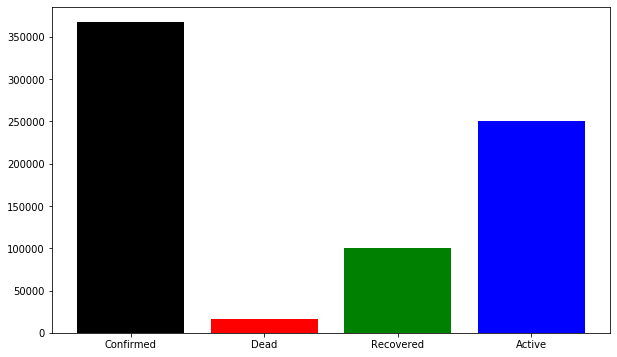

In [7]:
#DATA ANALYSIS

import matplotlib.pylab as plt

names = list(dict.keys())
values = list(dict.values())

plt.figure(figsize=(10, 6))
plt.bar(range(len(dict)),values,tick_label=names,color=['black', 'red', 'green', 'blue'])


COUNTRY-WISE STATISTICS

In [8]:
#DATA EXTRACTION

#List of affected countries
countryCells=data.select('td[style*="vertical-align: middle"]')

countryList=[]
totalCountries=len(countryCells)
a=0

while a<totalCountries:
    countryName=countryCells[a].text
    countryList.append(countryName)
    a=a+1
    
#List of Confirmed Cases
confirmedCases=data.find_all(class_='comma-num numbers confirmed')

confirmedList=[]
 
for i in confirmedCases:
    confirmedCounts= int(i.get_text())
    confirmedList.append(confirmedCounts)

#List of Dead Cases    
deadCases=data.find_all(class_="d-lg-table-cell comma-num numbers dead")

deadList=[]

for j in deadCases:
    deadCounts= int(j.get_text())
    deadList.append(deadCounts)    
    
#List of Recovered Cases
recoveredCases=data.find_all(class_="d-lg-table-cell comma-num numbers recovered")

recoveredList=[]

for k in recoveredCases:
    recoveredCounts= int(k.get_text())
    recoveredList.append(recoveredCounts)
    
        

In [9]:
# DATA PREPARATION

import pandas as pd

df = pd.DataFrame({'Country_name': countryList,
'Confirmed_cases': confirmedList,
'Dead_cases': deadList,
'Recovered_cases': recoveredList,
})

df.to_csv('Stats.csv') 
